In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Graphic Settings (Professional Style)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [3]:
def load_full_data(source_file='academicPerformanceData.xlsx'):
    print("📊 Initializing Data Analysis...")
    
    # Load and Clean Data (Standard Procedure)
    try:
        # Header is sometimes on the 2nd row
        df = pd.read_excel(source_file, header=1)
    except:
        df = pd.read_excel(source_file)
        
    df = df.dropna(axis=1, how='all')
    if len(df.columns) > 8: df = df.iloc[:, :8]
    
    df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'Remarks']
    
    # Clean Target Column
    df['Remarks'] = df['Remarks'].astype(str).str.replace('Class', '').str.strip()
    df = df[df['Remarks'].apply(lambda x: x.isdigit())]
    df['Remarks'] = df['Remarks'].astype(int)
    
    print(f"✅ Data Loaded Successfully. Total Records: {len(df)}")
    return df

df = load_full_data()

📊 Initializing Data Analysis...
✅ Data Loaded Successfully. Total Records: 200000


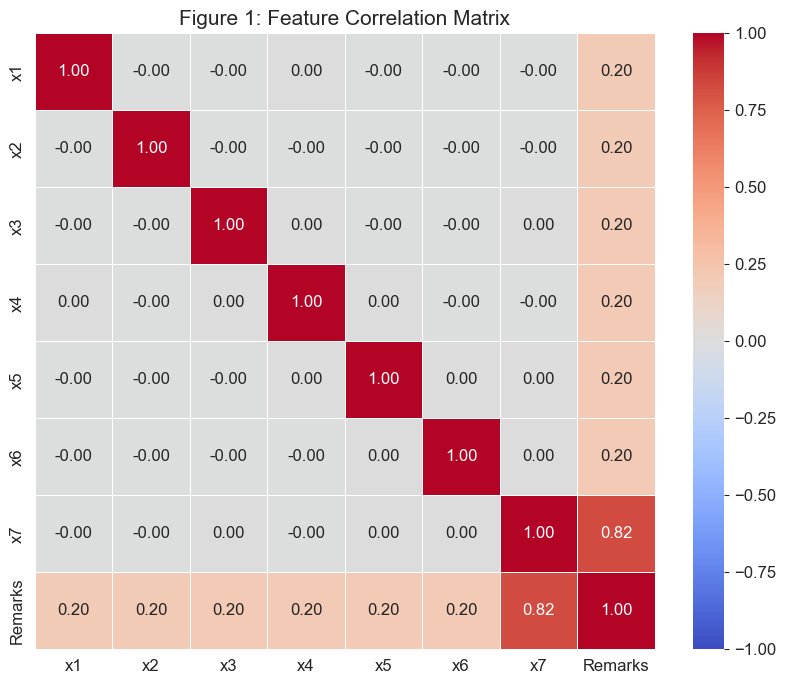

In [4]:
# ---------------------------------------------------------
# 1. CORRELATION ANALYSIS (Heatmap)
# PDF Requirement: i. Correlation coefficients of inputs and output
# ---------------------------------------------------------
plt.figure(figsize=(10, 8))

# Calculate Correlation Matrix
corr_matrix = df.corr()

# Draw Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Figure 1: Feature Correlation Matrix', fontsize=15)
plt.show()


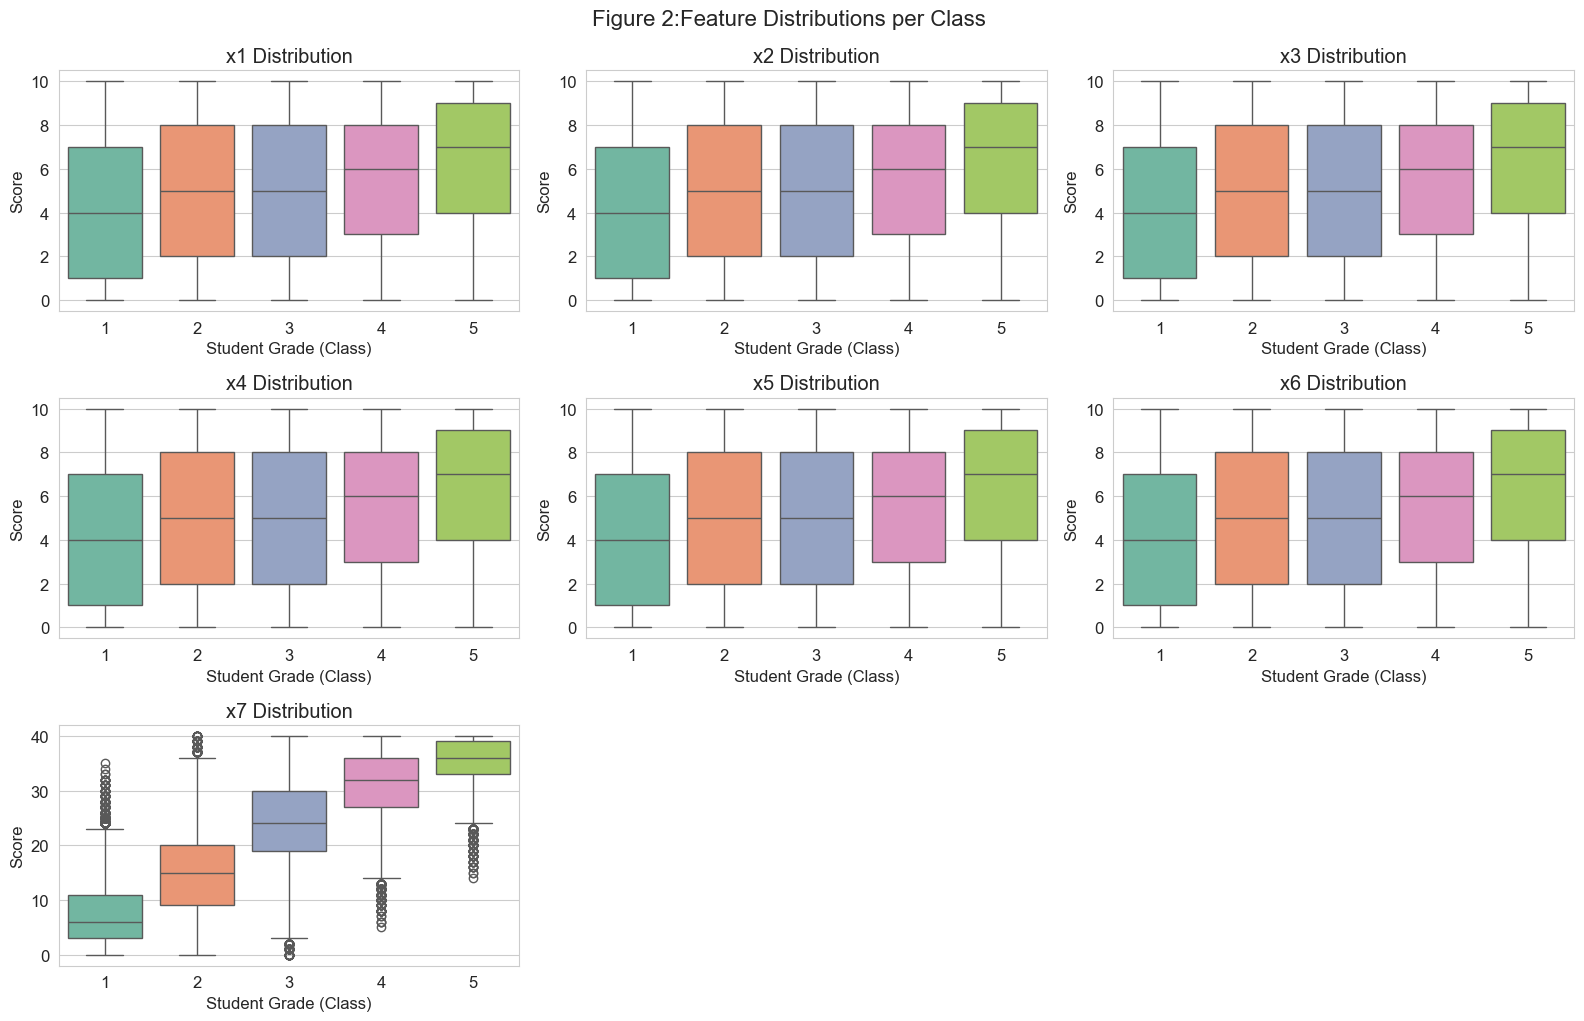

In [8]:
# ---------------------------------------------------------
# 2. CLASS DISTRIBUTIONS (Box Plots)
# Which features separate the classes best?
# ---------------------------------------------------------
plt.figure(figsize=(16, 10))
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Remarks', y=col, data=df, palette="Set2")
    plt.title(f'{col} Distribution')
    plt.xlabel('Student Grade (Class)')
    plt.ylabel('Score')

plt.tight_layout()
plt.suptitle('Figure 2:Feature Distributions per Class ', y=1.02, fontsize=16)
plt.show()

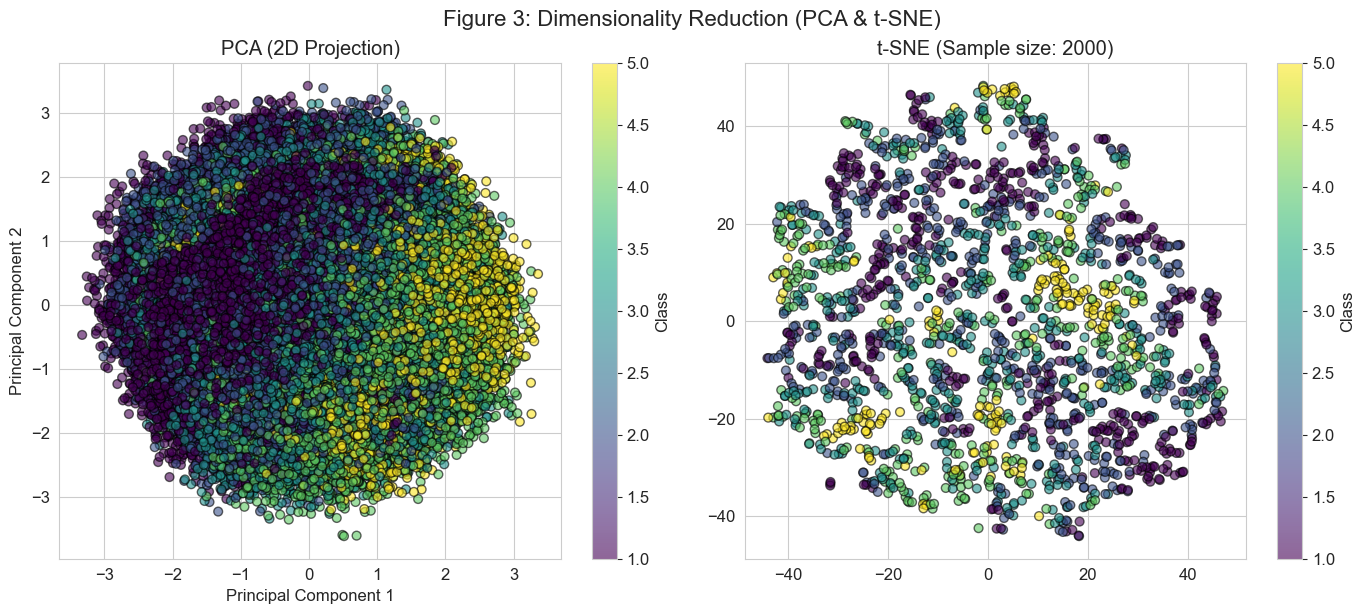

In [9]:
# ---------------------------------------------------------
# 3. DIMENSIONALITY REDUCTION (PCA & t-SNE)
# Visualizing the 7D data in 2D space. Are clusters separable?
# ---------------------------------------------------------
# Scale Data (Standardization is crucial for PCA/t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Remarks', axis=1))
y = df['Remarks']

# A) PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolor='k', s=40)
plt.colorbar(scatter, label='Class')
plt.title('PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# B) t-SNE (t-Distributed Stochastic Neighbor Embedding)
# t-SNE is slow on large data, so we take a random sample
sample_size = min(2000, len(df))
indices = np.random.choice(len(df), sample_size, replace=False)
X_tsne_input = X_scaled[indices]
y_tsne = y.iloc[indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_tsne_input)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tsne, cmap='viridis', alpha=0.6, edgecolor='k', s=40)
plt.colorbar(scatter2, label='Class')
plt.title(f't-SNE (Sample size: {sample_size})')

plt.tight_layout()
plt.suptitle('Figure 3: Dimensionality Reduction (PCA & t-SNE)', y=1.02, fontsize=16)
plt.show()

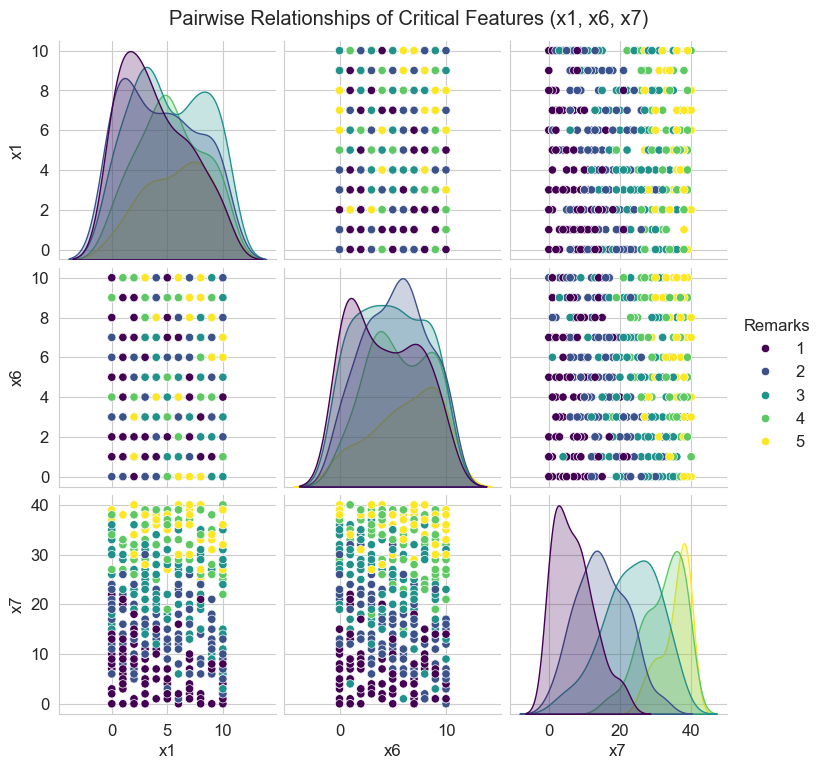

In [7]:
# ---------------------------------------------------------
# 4. PAIRPLOT (Critical Features)
# ---------------------------------------------------------
# Taking a subset to avoid performance issues
subset_df = df.sample(n=min(500, len(df)), random_state=42)
sns.pairplot(subset_df, hue='Remarks', vars=['x1', 'x6', 'x7'], palette='viridis')
plt.suptitle('Pairwise Relationships of Critical Features (x1, x6, x7)', y=1.02)
plt.show()